### Evaluation Project - 8
### Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train dataset
df_train= pd.read_excel('Data_Train.xlsx')

In [3]:
#dispalying 1st 5 records
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### 1)Except Price (target ,int64) all other features are of Object type .
#### 2) we can see there are no null values present.
#### 3) There are 10683 records and 11 columns (10683*11)

In [5]:
# displaying Column names
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
### checking NAN values and droping them
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### we can see no null values present now in  train dataset .

In [7]:
### droping NAN values 
df_train.dropna(inplace=True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df_train.shape

(10682, 11)

### Handling categorical data

**1)Nominal encoding :**  
will use one hot encoding
**2)Ordinal encoding :**  will use Label Encoding

In [9]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

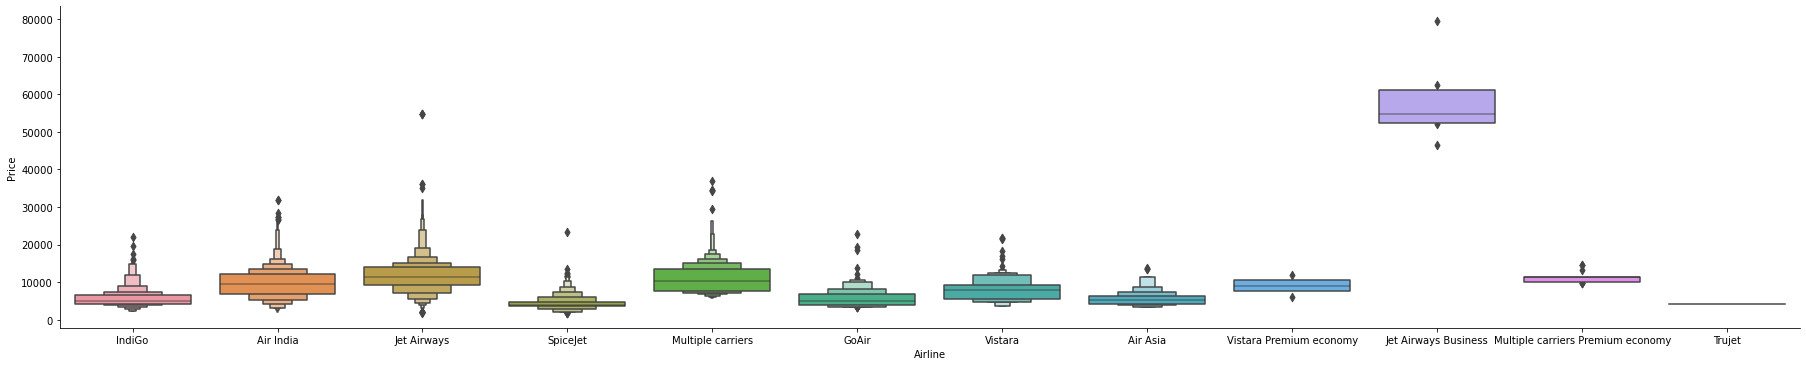

In [10]:
# Airline Vs Price
sns.catplot(x=df_train['Airline'] ,y=df_train['Price'] ,data=df_train.sort_values('Price' , ascending=False) , kind='boxen' ,height= 5 ,aspect=5)

#### we can  see Jet airways business has heighest business whereas Trujet has lowest .

#### Airline nominal data : will perform One hot encoding

In [11]:
df_train=pd.get_dummies(df_train, columns=['Airline'] , drop_first=True)
df_train.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,0,1,0,0,0,0,0,0,0,0
1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,...,0,0,0,0,0,0,0,0,0,0
2,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,...,0,0,1,0,0,0,0,0,0,0
3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,...,0,1,0,0,0,0,0,0,0,0
4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,...,0,1,0,0,0,0,0,0,0,0


In [12]:
# checking diffrent airlines
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

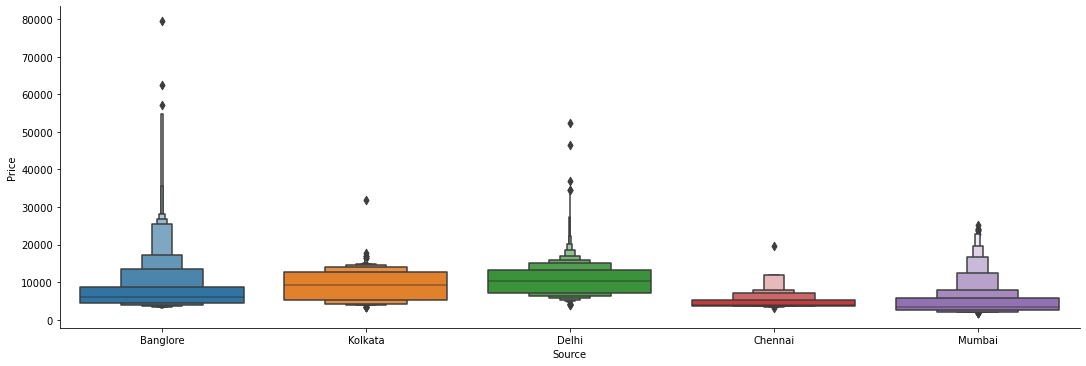

In [13]:
# Airline Vs Price
sns.catplot(x=df_train['Source'] ,y=df_train['Price'] ,data=df_train.sort_values('Price' , ascending=False) , kind='boxen' ,height= 5 ,aspect=3)

#### Banglore is having heighest Price  n Chennai has lowest . we can see some outliers are there .

In [14]:
# Source is nominal feature so will be doing one hot encoding
df_train =pd.get_dummies(df_train ,columns=['Source'] ,drop_first=True)
df_train.head()

,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,24/03/2019,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,...,0,0,0,0,0,0,0,0,0,0
1,1/05/2019,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,...,0,0,0,0,0,0,0,0,1,0
2,9/06/2019,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,...,0,0,0,0,0,0,0,1,0,0
3,12/05/2019,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,...,0,0,0,0,0,0,0,0,1,0
4,01/03/2019,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# checking diffrent Destination
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

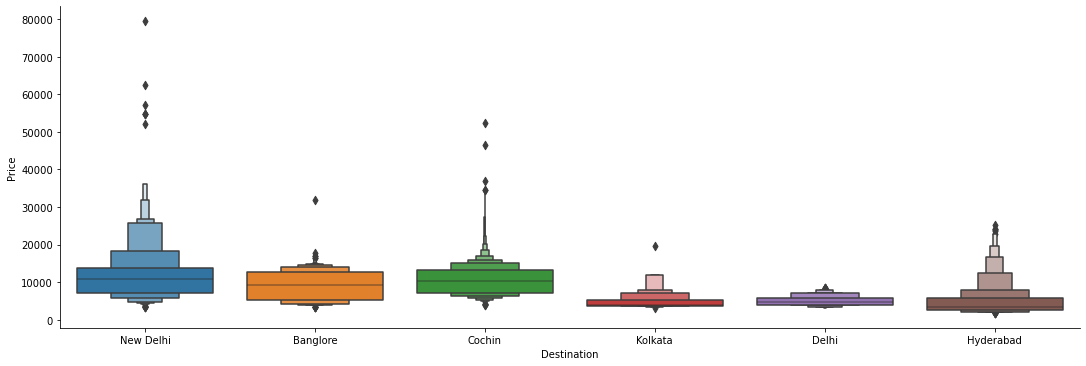

In [16]:
# Airline Vs Price
sns.catplot(x=df_train['Destination'] ,y=df_train['Price'] ,data=df_train.sort_values('Price' , ascending=False) , kind='boxen' ,height= 5 ,aspect=3)

#### Destination New Delhi has heighest price and Delhi has lowest.

In [17]:
# Destination is nominal feature so will be doing one hot encoding
df_train =pd.get_dummies(df_train ,columns=['Destination'] ,drop_first=True)
df_train.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# checking diffrent Route
df_train['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BOM → JLR → HYD                   1
BOM → JAI → DEL → HYD             1
CCU → IXB → DEL → BLR             1
BOM → COK → MAA → HYD             1
Name: Route, Length: 128, dtype: int64

In [19]:
# checking Additional_Info
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [20]:
## percentage of 'no info' in 'Additional_Info' 
no_info = (8344/10682)*100
no_info

78.1127129750983

In [21]:
# route and Total stops are related to each other so we can get information by including anyon eof them so , will drop one .
# since  'Additional_Info' column has 80% no Info ,so will drop tjis one too.

df_train.drop(['Additional_Info','Route'] ,axis=1, inplace=True)

In [22]:
df_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,3897,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2 stops,7662,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,13882,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1 stop,6218,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1 stop,13302,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# checking Total_Stops
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

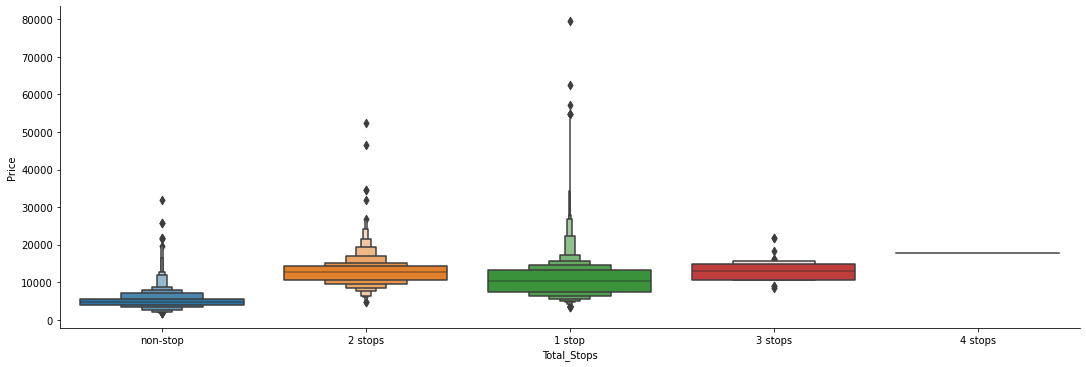

In [24]:
# Total_Stops Vs Price
sns.catplot(x=df_train['Total_Stops'] ,y=df_train['Price'] ,data=df_train.sort_values('Price' , ascending=False) , kind='boxen' ,height= 5 ,aspect=3)

#### here we can see it is ordinal kind of categorical Data so will use label Encoder for the same

In [25]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
df_train['Total_Stops']=lb.fit_transform(df_train['Total_Stops'])

In [26]:
df_train['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [27]:
df_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,4,3897,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,1,7662,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,1,13882,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,0,6218,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,0,13302,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### EDA

#### We can see that 'Date_of_Journey' is object time wwe will convert it into timestamp so that we can process string data for further process. 
#### will use pandas  to_datetime function to convert object into datetime .


In [28]:
# extrcating only day by using ,dt.day
df_train['Journey_Day']=pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.day
# extrcating only month by using ,dt.month
df_train['Journey_Month']=pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%Y').dt.month

#### here we can see it is ordinal kind of categorical Data so will use label Encoder for the same

In [29]:
df_train.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,4,3897,0,0,1,0,...,0,0,0,0,0,0,0,1,24,3
1,1/05/2019,05:50,13:15,7h 25m,1,7662,1,0,0,0,...,0,1,0,0,0,0,0,0,1,5
2,9/06/2019,09:25,04:25 10 Jun,19h,1,13882,0,0,0,1,...,1,0,0,1,0,0,0,0,9,6
3,12/05/2019,18:05,23:30,5h 25m,0,6218,0,0,1,0,...,0,1,0,0,0,0,0,0,12,5
4,01/03/2019,16:50,21:35,4h 45m,0,13302,0,0,1,0,...,0,0,0,0,0,0,0,1,1,3


#### now will drop 'Date_of_Journey' since we have taken out date and month and since data is from one year only so will not extract year separately.

In [30]:
df_train.drop('Date_of_Journey' , inplace=True ,axis=1)

In [31]:
df_train.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
0,22:20,01:10 22 Mar,2h 50m,4,3897,0,0,1,0,0,...,0,0,0,0,0,0,0,1,24,3
1,05:50,13:15,7h 25m,1,7662,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,5
2,09:25,04:25 10 Jun,19h,1,13882,0,0,0,1,0,...,1,0,0,1,0,0,0,0,9,6
3,18:05,23:30,5h 25m,0,6218,0,0,1,0,0,...,0,1,0,0,0,0,0,0,12,5
4,16:50,21:35,4h 45m,0,13302,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,3


#### for 'Arrival_Time' and 'Dep_Time' will do same process converting Object type into datetime and then extracting hours and mins.

In [32]:
df_train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
01:35      1
04:15      1
12:05      1
21:40      1
04:50      1
Name: Dep_Time, Length: 222, dtype: int64

#### we can see it has only hrs:min fromat sec. not present.

In [33]:
# extracting hours
df_train['Dep_hr']=pd.to_datetime(df_train['Dep_Time']).dt.hour
# extracting minutes
df_train['Dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute

In [34]:
# Droping 'Dep_Time' 
df_train.drop('Dep_Time' , inplace=True ,axis=1)

In [35]:
df_train.head()

,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hr,Dep_min
0,01:10 22 Mar,2h 50m,4,3897,0,0,1,0,0,0,...,0,0,0,0,0,1,24,3,22,20
1,13:15,7h 25m,1,7662,1,0,0,0,0,0,...,0,0,0,0,0,0,1,5,5,50
2,04:25 10 Jun,19h,1,13882,0,0,0,1,0,0,...,0,1,0,0,0,0,9,6,9,25
3,23:30,5h 25m,0,6218,0,0,1,0,0,0,...,0,0,0,0,0,0,12,5,18,5
4,21:35,4h 45m,0,13302,0,0,1,0,0,0,...,0,0,0,0,0,1,1,3,16,50


In [36]:
df_train['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
02:10 13 Mar      1
00:10 22 Mar      1
13:20 19 Mar      1
02:20 22 Jun      1
19:15 02 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [37]:
# extracting hours
df_train['Arrival_hr']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
# extracting minutes
df_train['Arrival_min']=pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [38]:
 #Droping 'Arrival_Time' 
df_train.drop('Arrival_Time' , inplace=True ,axis=1)

In [39]:
df_train.head()

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,2h 50m,4,3897,0,0,1,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,7h 25m,1,7662,1,0,0,0,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,19h,1,13882,0,0,0,1,0,0,0,...,0,0,0,0,9,6,9,25,4,25
3,5h 25m,0,6218,0,0,1,0,0,0,0,...,0,0,0,0,12,5,18,5,23,30
4,4h 45m,0,13302,0,0,1,0,0,0,0,...,0,0,0,1,1,3,16,50,21,35


In [40]:
# checking diffrent Duration
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
42h 45m      1
29h 10m      1
13h 35m      1
41h 20m      1
31h 30m      1
Name: Duration, Length: 368, dtype: int64

In [41]:
# we need to separate out hrs and min. from Duration , but in  few Duration only hrs are present and infew only min. 
#are present while splitting and extracting data using .split('h') , .split('m') it will through error .So we will 
#convert data in same format by adding 0hrs in only min data and by adding 0 mins in only hrs data . 
# so will make std format as (..h ..m) .

duration_hrs=[]
duration_mins=[]
duration=list(df_train['Duration'])
len(duration)

for i in range(len(duration)):
    dur_split=duration[i].split()
    if len(dur_split)!=2 :                                # only when any one parameter present (h or m)
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() +' 0m'      # adding 0 mins to only hrs record
        else:
            duration[i] = '0h ' + duration[i]            # adding 0 hrs to only min record
            
for i in range(len(duration)):
    dur_split=duration[i].split()            
    duration_hrs.append(dur_split[0].split('h')[0])      # adding hrs 
    duration_mins.append(dur_split[1].split('m')[0])     # adding mins


In [42]:
# adding new cols'Duration_hrs' and 'Duration_mins' to dataframe
df_train['Duration_hrs']=duration_hrs
df_train['Duration_mins'] =duration_mins

In [43]:
# will drop 'Duration'
df_train.drop('Duration' , inplace=True , axis=1)

In [44]:
df_train.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hrs,Duration_mins
0,4,3897,0,0,1,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,1,7662,1,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,1,13882,0,0,0,1,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,0,6218,0,0,1,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,0,13302,0,0,1,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


In [45]:
df_train.shape

(10682, 30)

### Working with Test data

In [46]:
df_test=pd.read_excel('Test_set.xlsx')

In [47]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
df_test.shape

(2671, 10)

#### here only one column is missing i.e. price (target column) .
#### we have not combined train and test data to eliminate problem of Data leakage . if we will combine them while preprocessing model may get aware of test data and it may lead to data Overfitting problem .

In [49]:
## We have to perform all data preprocessing steps again for test data as done for train dataset

**Test data Preprocessing**

In [50]:
### checking NAN values and droping them
print("Number of null values present",df_train.isnull().sum())
### droping NAN values 
df_train.dropna(inplace=True)
df_train.isnull().sum()

Number of null values present Total_Stops                                  0
Price                                        0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata           

Total_Stops                                  0
Price                                        0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_N

In [51]:
#### Airline nominal data : will perform One hot encoding

df_test=pd.get_dummies(df_test, columns=['Airline'] , drop_first=True)
df_test.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,1,0,0,0,0,0,0
1,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,1,0,0,0,0,0,0,0
2,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,1,0,0,0,0,0,0
3,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,0,0,1,0,0,0,0
4,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,0,0,0,0,0,0,0,0,0


In [52]:
# Source is nominal feature so will be doing one hot encoding
df_test =pd.get_dummies(df_test ,columns=['Source'] ,drop_first=True)
df_test.head()

,Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,...,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,6/06/2019,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,...,0,0,0,0,0,0,0,1,0,0
1,12/05/2019,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,...,0,0,0,0,0,0,0,0,1,0
2,21/05/2019,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,...,0,0,0,0,0,0,0,1,0,0
3,21/05/2019,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,...,0,1,0,0,0,0,0,1,0,0
4,24/06/2019,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Destination is nominal feature so will be doing one hot encoding
df_test =pd.get_dummies(df_test ,columns=['Destination'] ,drop_first=True)
df_test.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# route and Total stops are related to each other so we can get information by including anyon eof them so , will drop one .
# since  'Additional_Info' column has 80% no Info ,so will drop tjis one too.

df_test.drop(['Additional_Info','Route'] ,axis=1, inplace=True)

In [55]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
df_test['Total_Stops']=lb.fit_transform(df_test['Total_Stops'])

#### We can see that 'Date_of_Journey' is object time wwe will convert it into timestamp so that we can process string data for further process. 
#### will use pandas  to_datetime function to convert object into datetime .


In [56]:
# extrcating only day by using ,dt.day
df_test['Journey_Day']=pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.day
# extrcating only month by using ,dt.month
df_test['Journey_Month']=pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y').dt.month

#### here we can see it is ordinal kind of categorical Data so will use label Encoder for the same

#### now will drop 'Date_of_Journey' since we have taken out date and month and since data is from one year only so will not extract year separately.

In [57]:
df_test.drop('Date_of_Journey' , inplace=True ,axis=1)

#### for 'Arrival_Time' and 'Dep_Time' will do same process converting Object type into datetime and then extracting hours and mins.

In [58]:
# extracting hours
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
# extracting minutes
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

In [59]:
# Droping 'Dep_Time' 
df_test.drop('Dep_Time' , inplace=True ,axis=1)

In [60]:
# extracting hours
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
# extracting minutes
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [61]:
 #Droping 'Arrival_Time' 
df_test.drop('Arrival_Time' , inplace=True ,axis=1)

In [62]:
# we need to separate out hrs and min. from Duration , but in  few Duration only hrs are present and infew only min. 
#are present while splitting and extracting data using .split('h') , .split('m') it will through error .So we will 
#convert data in same format by adding 0hrs in only min data and by adding 0 mins in only hrs data . 
# so will make std format as (..h ..m) .

duration_hrs_test=[]
duration_mins_test=[]
duration=list(df_test['Duration'])
len(duration)

for i in range(len(duration)):
    dur_split=duration[i].split()
    if len(dur_split)!=2 :                                # only when any one parameter present (h or m)
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() +' 0m'      # adding 0 mins to only hrs record
        else:
            duration[i] = '0h ' + duration[i]            # adding 0 hrs to only min record
            
for i in range(len(duration)):
    dur_split=duration[i].split()            
    duration_hrs_test.append(dur_split[0].split('h')[0])      # adding hrs 
    duration_mins_test.append(dur_split[1].split('m')[0])     # adding mins


In [63]:
# adding new cols'Duration_hrs' and 'Duration_mins' to dataframe
df_test['Duration_hrs']=duration_hrs_test
df_test['Duration_mins'] =duration_mins_test

In [64]:
# will drop 'Duration'
df_test.drop('Duration' , inplace=True , axis=1)

In [65]:
df_test.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,...,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hrs,Duration_mins
0,0,0,0,0,1,0,0,0,0,0,...,0,0,6,6,17,30,4,25,10,55
1,0,0,0,1,0,0,0,0,0,0,...,0,0,12,5,6,20,10,20,4,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,21,5,19,15,19,0,23,45
3,0,0,0,0,0,0,1,0,0,0,...,0,0,21,5,8,0,21,0,13,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,24,6,23,55,2,45,2,50


In [66]:
df_test.shape

(2671, 28)

#### Splitting train data for model building

In [67]:
df_train.columns

Index(['Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey_Day',
       'Journey_Month', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Duration_hrs', 'Duration_mins'],
      dtype='object')

In [68]:
x=df_train.drop('Price' ,axis=1)
x.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hrs,Duration_mins
0,4,0,0,1,0,0,0,0,0,0,...,0,1,24,3,22,20,1,10,2,50
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,1,0,0,0,1,0,0,0,0,0,...,0,0,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,...,0,1,1,3,16,50,21,35,4,45


In [69]:
y=df_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [70]:
# finding correlation between target variable and independent variable
df_train.corr()['Price'].sort_values(ascending=False)

Price                                        1.000000
Airline_Jet Airways                          0.416124
Source_Delhi                                 0.270676
Destination_Cochin                           0.270676
Airline_Jet Airways Business                 0.253303
Destination_New Delhi                        0.189777
Airline_Multiple carriers                    0.139793
Airline_Air India                            0.050432
Arrival_hr                                   0.024244
Airline_Multiple carriers Premium economy    0.017650
Source_Kolkata                               0.009358
Dep_hr                                       0.006799
Airline_Vistara Premium economy             -0.000454
Airline_Trujet                              -0.010381
Dep_min                                     -0.024458
Airline_Vistara                             -0.060654
Arrival_min                                 -0.086155
Airline_GoAir                               -0.095151
Journey_Month               

In [71]:
df_train.corr()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
Total_Stops,1.000000,-0.571221,-0.007335,0.033030,0.261658,-0.262310,-0.014764,-0.276971,-0.028182,0.289853,...,0.515760,0.315130,0.270634,-0.021872,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980
Price,-0.571221,1.000000,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,...,-0.313417,-0.230755,-0.179223,0.189777,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Airline_Air India,-0.007335,0.050432,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,...,-0.068370,0.022268,-0.051068,0.053072,-0.032490,-0.045981,-0.012879,-0.045688,0.088872,0.061231
Airline_GoAir,0.033030,-0.095151,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,-0.004747,-0.039166,...,0.099863,-0.035933,-0.026156,0.017573,-0.003122,-0.004494,-0.016373,0.076751,0.018526,0.096839
Airline_IndiGo,0.261658,-0.361070,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,-0.017026,-0.140464,...,0.090354,0.059686,0.141911,-0.018626,0.007281,-0.048504,-0.023395,-0.014714,-0.071491,0.035124
Airline_Jet Airways,-0.262310,0.416124,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,-0.026199,-0.216132,...,-0.051787,-0.025382,-0.144341,0.056782,-0.017304,0.059735,0.113942,0.024455,-0.027377,-0.057698
Airline_Jet Airways Business,-0.014764,0.253303,-0.010497,-0.003224,-0.011563,-0.017793,1.000000,-0.008418,-0.000828,-0.006827,...,-0.008689,-0.006263,-0.004559,0.048675,-0.031713,-0.034787,-0.007524,0.009168,-0.014456,0.005232
Airline_Multiple carriers,-0.276971,0.139793,-0.157223,-0.048292,-0.173196,-0.266497,-0.008418,1.000000,-0.012395,-0.102253,...,-0.130141,-0.093814,-0.068288,-0.109782,0.042163,0.053685,-0.149992,-0.109370,0.067930,-0.167455
Airline_Multiple carriers Premium economy,-0.028182,0.017650,-0.015456,-0.004747,-0.017026,-0.026199,-0.000828,-0.012395,1.000000,-0.010052,...,-0.012794,-0.009223,-0.006713,-0.010792,0.030839,-0.051222,-0.028672,-0.004624,0.013491,-0.001786
Airline_SpiceJet,0.289853,-0.296565,-0.127510,-0.039166,-0.140464,-0.216132,-0.006827,-0.102253,-0.010052,1.000000,...,0.043723,0.097824,0.187590,-0.034144,0.022154,-0.011977,-0.010451,0.092634,-0.090058,0.012543


<AxesSubplot:>

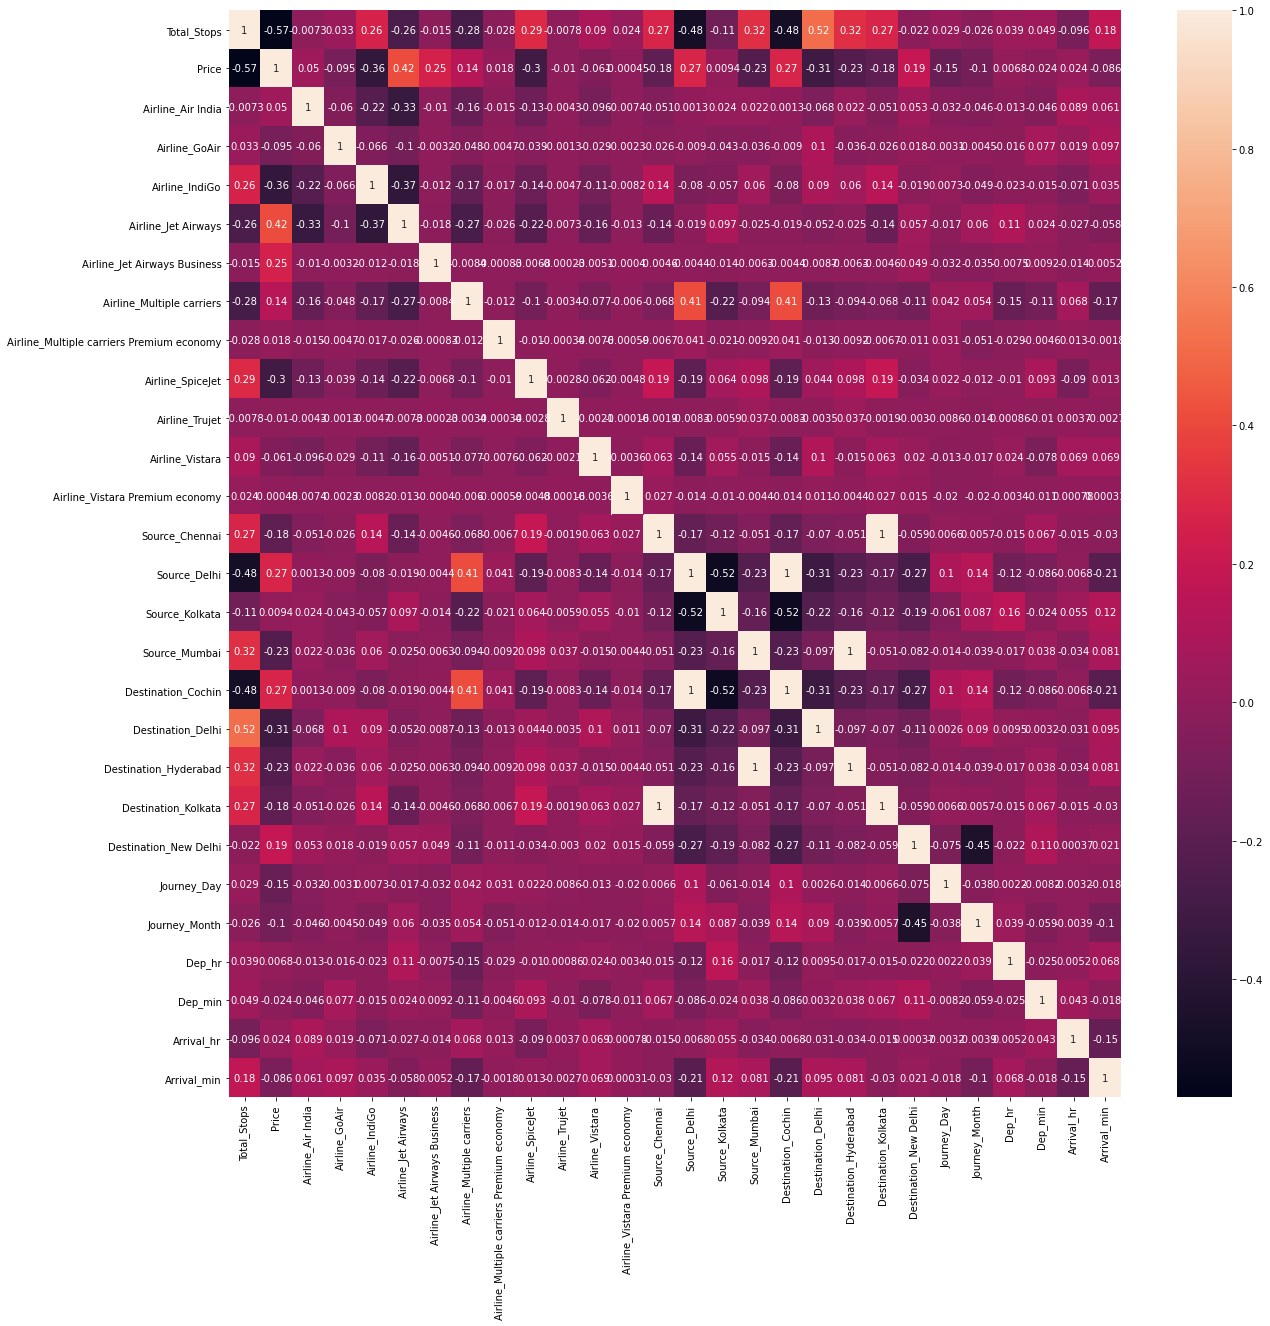

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr() ,annot=True)


In [73]:
# Important feature using Xtratree regressor
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:>

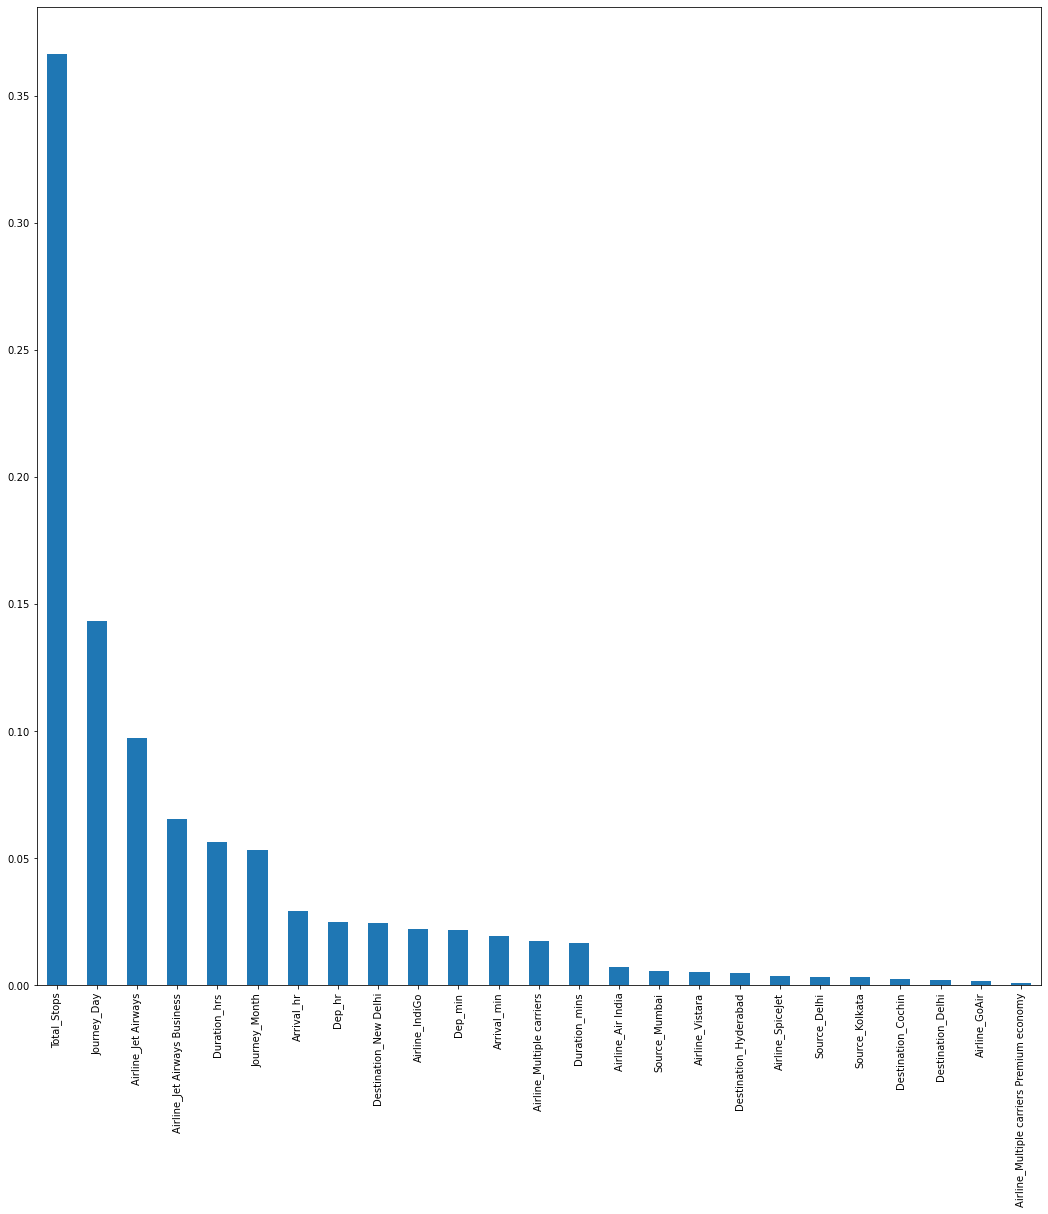

In [74]:
# plot gragh of importance of features
plt.figure(figsize=(18,18))
importance_feature =pd.Series(ext.feature_importances_ , index= x.columns)
importance_feature.nlargest(25).plot(kind='bar')

 we can see TOtal stop is having heighest importance and df_train['Airline_Multiple carriers Premium economy'] have lowest importance.

### Model 1 Random Forest

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor()

**Will find out best random_state value**

In [76]:
max_accu = 0
max_randst = 0
for i in range (0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    rf.fit(x_train,y_train)
    
    pred_test=rf.predict(x_test)
    accu_score= r2_score(y_test,pred_test)
    if max_accu<accu_score:
        max_accu= accu_score
        max_randst= i
    


In [77]:
print(f"Maximum accuracy is {accu_score} at Random State value {max_randst}")

Maximum accuracy is 0.8072440555530129 at Random State value 277


In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=277)
rf.fit(x_train,y_train)
    
pred_test=rf.predict(x_test)

test_score= r2_score(y_test,pred_test)

print("Test_score :",test_score)

Train_score : 0.858635074599881
Test_score : 0.858635074599881


In [79]:
#Displaying prediction result on test data
prediction=pd.DataFrame()
prediction['y_test']=y_test
prediction['pred_test']=pred_test
prediction.head()

,y_test,pred_test
7114,7064,11888.097000
4118,10703,10738.940000
8700,4332,4823.806667
8188,8140,9392.870000
7726,5403,5468.810000


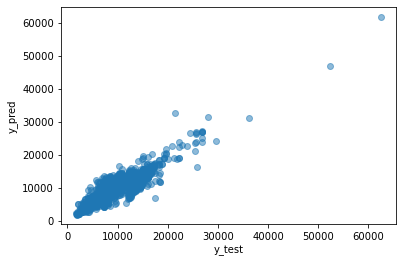

In [80]:
plt.scatter(y_test, pred_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [81]:
print('MAE:', mean_absolute_error(y_test, pred_test))
print('MSE:', mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_test)))

MAE: 1118.1075906657034
MSE: 3026236.814267683
RMSE: 1739.608235858776


In [82]:
from sklearn.ensemble import AdaBoostRegressor ,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

**Model Creation**

In [92]:
rf=RandomForestRegressor() # Random Regressor
dt=DecisionTreeRegressor() # Deciesion Tree Regressor
adb=AdaBoostRegressor()    # Adaboost Regressor    
gdboost=GradientBoostingRegressor() #Gradient Boosting Regressor
model_name=['RandomForestRegressor','DecisionTreeRegressor','AdaBoostRegressor','GradientBoostingRegressor']
model=[rf,dt,adb,gdboost]
print("Model is created")

Model is created


Train out the models.

In [112]:
Model_report = pd.DataFrame(columns=['Model_name','R2_Score','MAE','MSE','RMSE','Cross_val_score'])

RandomForestRegressor


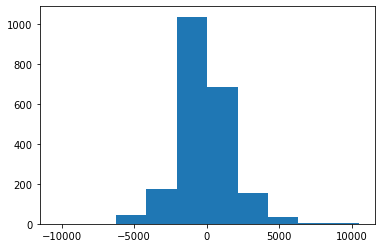


Test_score : 0.8578457963341531
MAE: 1119.179521456511
MSE: 3048829.068063313
RMSE: 1746.0896506374788
0.809
_______________________________________________________________________

DecisionTreeRegressor


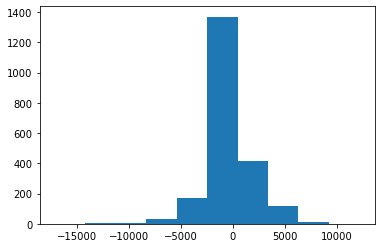


Test_score : 0.8578457963341531
MAE: 1290.3299797223522
MSE: 4931954.03207378
RMSE: 2220.8003134171654
0.718
_______________________________________________________________________

AdaBoostRegressor


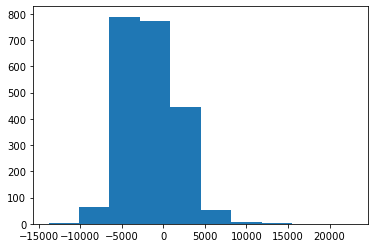


Test_score : 0.8578457963341531
MAE: 2983.4433505389893
MSE: 12731405.567466365
RMSE: 3568.109522907945
0.367
_______________________________________________________________________

GradientBoostingRegressor


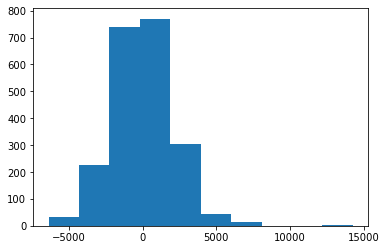


Test_score : 0.8578457963341531
MAE: 1531.4369687791695
MSE: 4242751.528316706
RMSE: 2059.794049976042
0.766
_______________________________________________________________________



In [115]:
j=0
for i in model:
    
    i.fit(x_train, y_train)
   
    modelname=model_name[j]
   
    print(modelname)
    
    y_test_pred= i.predict(x_test) 
    R2_Score= r2_score(y_test,y_test_pred)
    
    # plotting the error in orediction and actual test data
    plt.hist(y_test - y_test_pred )
    plt.show()
    print()
    
    MAE = mean_absolute_error(y_test, y_test_pred)
    MSE = mean_squared_error(y_test, y_test_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_test_pred))
    
   
    print("Test_score :",test_score)
    print('MAE:', mean_absolute_error(y_test, y_test_pred))
    
    print('MSE:', mean_squared_error(y_test, y_test_pred))
   
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    ### cross val score
    
   

    for k in range(2,15):
        ls_cvScore=cross_val_score(i,x,y,cv=k)
        ls_cvScore_mean = ls_cvScore.mean()
        cross_val_mean =round(ls_cvScore_mean,3)
    print(cross_val_mean)

   
    print("_______________________________________________________________________\n")
    
    Model_report=Model_report.append({
                                   'Model_name':modelname,'R2_Score':R2_Score,
                                   'MAE':MAE,'MSE':MSE , 'RMSE':RMSE ,'Cross_val_score':cross_val_mean
                                   },ignore_index=True)
    j=j+1

In [116]:
# printing Model_report
Model_report

,Model_name,R2_Score,MAE,MSE,RMSE,Cross_val_score
0,RandomForestRegressor,0.857580,1119.179521,3.048829e+06,1746.089651,0.809
1,DecisionTreeRegressor,0.769613,1290.329980,4.931954e+06,2220.800313,0.718
2,AdaBoostRegressor,0.405276,2983.443351,1.273141e+07,3568.109523,0.367
3,GradientBoostingRegressor,0.801808,1531.436969,4.242752e+06,2059.794050,0.766


#### Looking at the R2_score (highest is good ),RMSE (lowest is good its error in prediction) and Cross_value_score(heighest is good) will choose Random Forest Regressor
#### with R2_score = 85.8 % and RMSE = 1743.8 and CV_score =80.9% Which is quite good


### Hyper parameter tunning

In [117]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [118]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [120]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=10, n_estimators=1800)

In [121]:
#prediction with best parameter
y_test_pred=rf_random.best_estimator_.predict(x_test) 
# best score 
R2_Score= r2_score(y_test,y_test_pred)
print(R2_Score)

0.8579603564350669


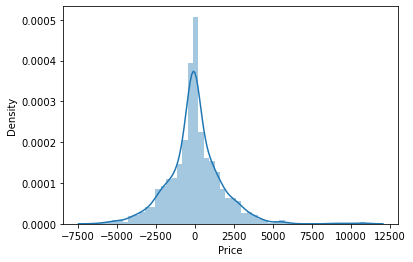

In [123]:
# plotting the error in orediction and actual test data
sns.distplot(y_test - y_test_pred )
plt.show()


#### It shows gausian curve ,normalized data distribution .

In [125]:
import joblib
joblib.dump(RandomizedSearchCV , "FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']